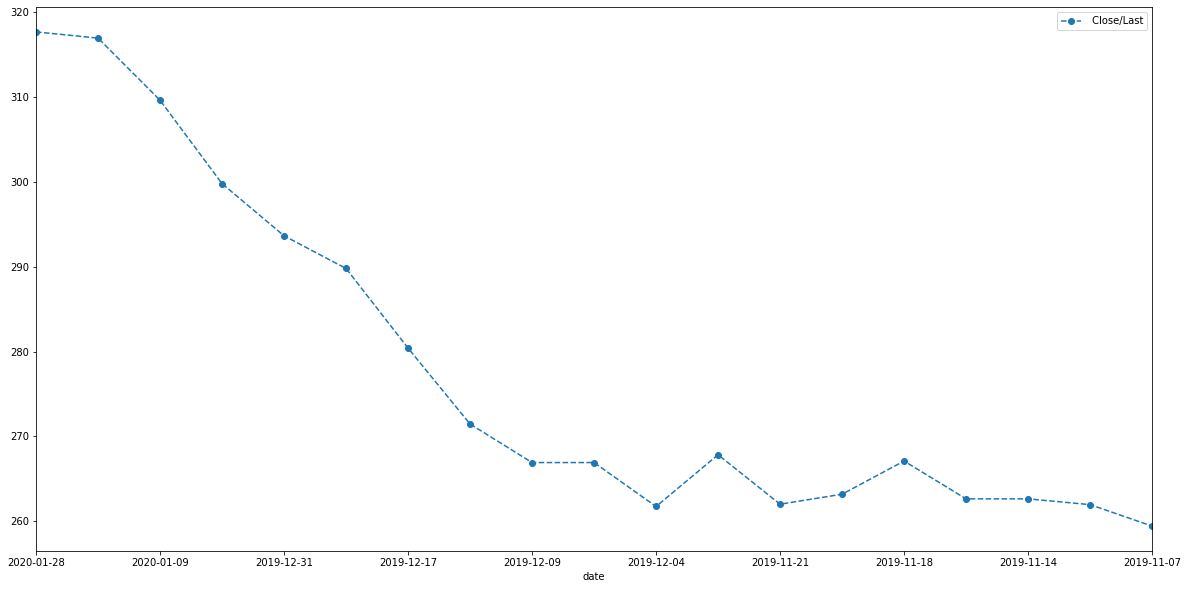

In [2]:
import pandas as pd
import json
from datetime import datetime


#Load Press Release file

with open('C:/Users/ADMIN/Downloads/AAPL_pr.json', 'r',encoding='utf-8') as myfile:
    data=json.load(myfile)
df = pd.DataFrame(data)


newlist=[]
for i in df['date']:
    m="".join(str(i))
    m=m.lstrip()
    m=m.partition('AM')[0]
    m=m.partition('PM')[0]
    m=m.rsplit(' ', 1)[0]
    m=str(m)[0:]
    newdate=(datetime.strptime(m,'%b %d, %Y')) #%b %d,%Y
    newlist.append(newdate)
       

df1=pd.DataFrame(newlist)
df1.columns = ['date']
df1['date'].values
df['date']=df1['date']

#Load Stock File
df2=pd.read_csv('C:/Users/ADMIN/Downloads/AAPL_STOCK.csv')
df['date']=df['date'].astype(str)



res=pd.merge(df,df2,on='date', how='outer')


res[' Close/Last']=res[' Close/Last'].str[1:]
res[' Close/Last']=res[' Close/Last'].replace({',': ''}, regex=True)
res[' Open']=res[' Open'].str[1:]
res[' Open']=res[' Open'].replace({',': ''}, regex=True)
res[' High']=res[' High'].str[1:]
res[' High']=res[' High'].replace({',': ''}, regex=True)
res[' Low']=res[' Low'].str[1:]
res[' Low']=res[' Low'].replace({',': ''}, regex=True)
res=res.dropna()

res[' Close/Last']=res[' Close/Last'].astype(float)
res[' Open']=res[' Open'].astype(float)
res[' High']=res[' High'].astype(float)
res[' Low']=res[' Low'].astype(float)
   

import matplotlib.pyplot as plt
#%matplotib inline
import matplotlib


res.plot(x ='date', y=' Close/Last', linestyle='dashed', marker='o',figsize=(20, 10))
plt.show()